c = cdsapi.Client()

c.retrieve(
    'reanalysis-era5-pressure-levels-monthly-means',
    {
        'format': 'netcdf',
        'product_type': 'monthly_averaged_reanalysis',
        'variable': 'temperature',
        'pressure_level': [
            '1', '2', '3',
            '5', '7', '10',
            '20', '30', '50',
            '70', '100', '125',
            '150', '175', '200',
            '225', '250', '300',
            '350', '400', '450',
            '500', '550', '600',
            '650', '700', '750',
            '775', '800', '825',
            '850', '875', '900',
            '925', '950', '975',
            '1000',
        ],
        'year': ['%04d'%(year+1) for year in range(1940, 2022)],
        'month': ['%02d'%(month+1) for month in range(12)],
        'time': ['00:00', '12:00'],
        'area': [
            50, 5, 40,
            20,
        ],
    },
    'download.nc')

In [34]:
import netCDF4 as nc
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import datetime

In [5]:
file = nc.Dataset('zg_temp_00.nc', 'r')
vars = file.variables
zg_temp_00 = vars["t"][:].data
levels = vars["level"][:].data
file.close()

In [6]:
def get_averaged_differences(values):
    averaged_differences = []
    for level in range(len(levels)):

        averages_by_year = []
        sum = 0
        counter = 0

        for time_step in range(len(values)):
            sum += values[time_step][level][0][0] - 273.15
            if (time_step < 12 and counter == 11 or time_step > 12 and counter == 12):
                averages_by_year.append(sum)
                sum = 0
                counter = 0
            counter += 1

        differences = []

        for year in range(len(averages_by_year) - 1):
            differences.append(averages_by_year[year + 1] - averages_by_year[year])

        averaged_differences.append(np.average(differences))
        
    return averaged_differences

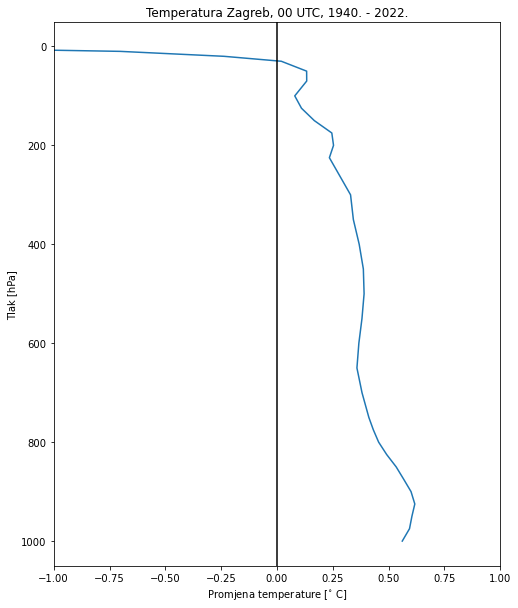

In [115]:
fig, ax = plt.subplots(1, 1, figsize=(8, 10))

ax.invert_yaxis()
ax.plot(get_averaged_differences(zg_temp_00), levels)
ax.axvline(0, color="k")
ax.set_xlim(-1, 1)

ax.set_title("Temperatura Zagreb, 00 UTC, 1940. - 2022.")
ax.set_xlabel(r"Promjena temperature [$^{\circ}$ C]")
ax.set_ylabel("Tlak [hPa]")

plt.savefig("zg_temp_00.png")

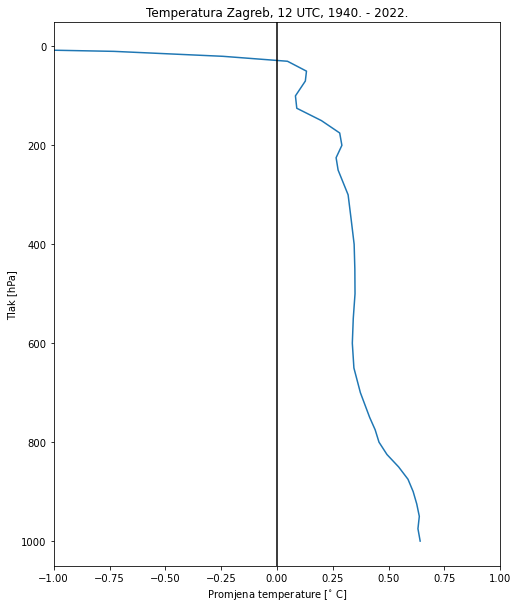

In [116]:
file = nc.Dataset('zg_temp_12.nc', 'r')
zg_temp_12 = file.variables["t"][:].data
file.close()

fig, ax = plt.subplots(1, 1, figsize=(8, 10))

ax.invert_yaxis()
ax.plot(get_averaged_differences(zg_temp_12), levels)
ax.axvline(0, color="k")
ax.set_xlim(-1, 1)

ax.set_title("Temperatura Zagreb, 12 UTC, 1940. - 2022.")
ax.set_xlabel(r"Promjena temperature [$^{\circ}$ C]")
ax.set_ylabel("Tlak [hPa]")

plt.savefig("zg_temp_12.png")

In [105]:
differences_by_level = []
for level in range(len(levels)):
    diff_by_year = []
    diff = []
    sum = 0
    counter = 0

    for time_step in range(len(zg_temp_12) - 1):
        current_diff = zg_temp_12[time_step + 1][level][0][0] - zg_temp_12[time_step][level][0][0]
        diff.append(current_diff)
        if (time_step < 12 and counter == 11 or time_step > 12 and counter == 12):
            diff_by_year.append(np.average(diff))
            diff = []
            counter = 0
        counter += 1
        
    differences_by_level.append(diff_by_year)

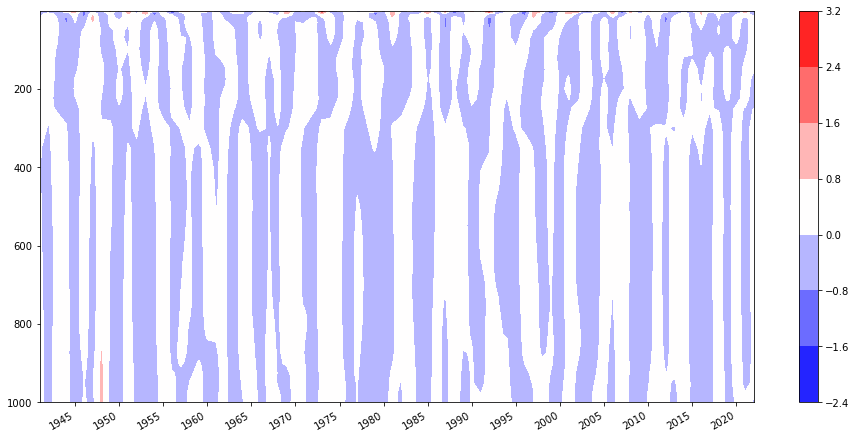

In [114]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

date_list = []

for year in range(1940, 2023):
    date = datetime.date(year, 1, 1)
    date_list.append(date)
        
x_values = np.arange(len(date_list))
[X, Y] = np.meshgrid(x_values[1:], levels)
        
plt.gcf().autofmt_xdate()
ax.invert_yaxis()

tick_indices = np.arange(0, len(date_list), 5)  # 12 months in a year
ax.set_xticks(tick_indices)
ax.set_xticklabels([date_list[i].strftime("%Y") for i in tick_indices])

contour = ax.contourf(X, Y, differences_by_level, cmap='bwr')
fig.colorbar(contour)

In [81]:
np.shape(differences_by_level)

(37, 82)

In [73]:
np.shape(X)

(37, 995)